In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Classified Data',index_col=0)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [9]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [15]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [20]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [21]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_feat
y = df['TARGET CLASS']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=17)

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [53]:
predictions = knn.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(confusion_matrix(y_test,predictions))

[[153   6]
 [  9 132]]


In [36]:
print(confusion_matrix(y_test,predictions))

[[151   8]
 [ 15 126]]


In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [47]:
error_rate = []

In [48]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

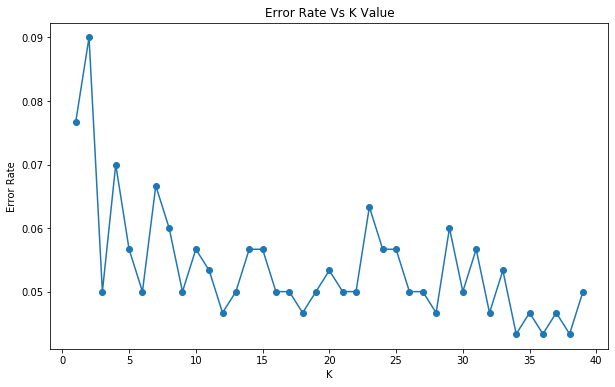

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o')
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
Erro

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]